In [1]:
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval
data_folder = os.path.join("..", "data")

/home/alfio/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv(os.path.join(data_folder, "time_sorted_table.csv"), sep=';', index_col=0)

In [3]:
cols_to_transform = ['seconds_to_incident_sequence', 'vehicles_sequence', 'events_sequence',
                     'train_kph_sequence', 'dj_ac_state_sequence', 'dj_dc_state_sequence']

for col in cols_to_transform:
    df[col] = df[col].apply(literal_eval)

In [4]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.approx_lon, df.approx_lat),
    crs="EPSG:4326")

In [5]:
gdf

,incident_id,vehicles_sequence,events_sequence,seconds_to_incident_sequence,approx_lat,approx_lon,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,incident_type,geometry
0,4432881,"[609, 609, 609, 609, 609, 609, 609, 609, 609, ...","[2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...","[-5510, -5510, -5507, -5507, -5506, -5506, -55...",50.876601,4.718143,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4,POINT (4.71814 50.8766)
1,4432943,"[526, 526, 1094, 526, 526, 526, 1094, 1094, 10...","[2744, 4148, 4016, 4394, 1566, 1570, 4394, 156...","[-8573, -8573, -8572, -8032, -8032, -8032, -80...",51.037435,4.431218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",13,POINT (4.43122 51.03744)
2,4432955,"[592, 592, 592, 643, 643, 643, 616, 616, 616, ...","[4394, 1566, 1570, 4394, 1566, 1570, 2674, 156...","[-12291, -12291, -12291, -12291, -12291, -1229...",50.864083,4.162115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",14,POINT (4.16212 50.86408)
3,4433021,"[663, 576, 663, 663, 663, 663, 576, 663, 663, ...","[4066, 4066, 3636, 3658, 4078, 4066, 4066, 363...","[-14353, -14351, -14340, -14340, -14330, -1420...",51.183220,4.276025,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2,POINT (4.27603 51.18322)
4,4433129,"[647, 647, 647, 647, 647, 647, 634, 634, 634, ...","[4002, 4032, 4028, 2852, 4026, 4110, 4002, 403...","[-227, -227, -226, -225, -225, -225, -224, -22...",50.818727,3.253601,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",14,POINT (3.2536 50.81873)
...,...,...,...,...,...,...,...,...,...,...,...
1006,4611953,"[1016, 1016, 1016, 1016, 1016, 1016, 1016, 101...","[4002, 2852, 4110, 2854, 4026, 4092, 4094, 261...","[-13963, -13961, -13961, -13959, -13958, -1395...",50.159057,5.972059,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",14,POINT (5.97206 50.15906)
1007,4611991,"[505, 1057, 524, 505, 1057, 524, 1057, 1057, 1...","[3490, 4124, 4066, 4068, 2956, 3658, 2956, 295...","[-14384, -14360, -14348, -14347, -14335, -1433...",50.767118,4.424321,"[83.2, 0.0, 0.3, 0.4, 13.0, 0.0, 65.0, 74.6, 7...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2,POINT (4.42432 50.76712)
1008,4612137,"[564, 564, 564, 564, 564, 564, 564, 564, 564, ...","[2956, 2956, 2956, 2956, 2956, 2956, 2956, 295...","[-14307, -14303, -14277, -14275, -14261, -1425...",51.164770,4.160534,"[31.9, 31.5, 49.0, 52.2, 56.9, 56.7, 55.3, 55....","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2,POINT (4.16053 51.16477)
1009,4612321,"[1011, 1011, 1011, 1011, 1011, 1011, 1011, 101...","[2956, 2956, 2956, 2956, 2956, 2956, 2956, 295...","[-14400, -14337, -14335, -14307, -14296, -1427...",50.161550,4.976849,"[116.4, 97.2, 96.9, 94.4, 95.3, 93.7, 94.3, 10...","[True, True, True, True, True, True, True, Tru...","[False, False, False, False, False, False, Fal...",13,POINT (4.97685 50.16155)


In [6]:
data_dir = os.path.join(data_folder, 'nuts/')
path_rg = data_dir + "NUTS_RG_01M_2021_3035_LEVL_0.json"
gdf_rg = gpd.read_file(path_rg)
path_bn = data_dir + "NUTS_BN_01M_2021_3035_LEVL_0.json"
gdf_bn = gpd.read_file(path_bn)

In [7]:
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")

In [8]:
gdf_rg.crs = "EPSG:3035"
gdf_rg = gdf_rg.to_crs("EPSG:3857")

In [12]:
belgium = gdf_rg[gdf_rg.CNTR_CODE == "BE"]

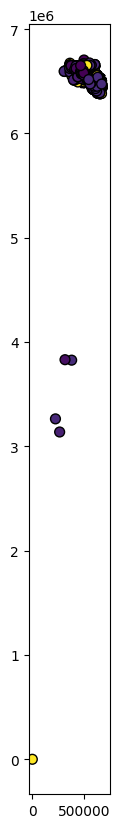

In [13]:
fig, ax = plt.subplots(figsize=(8, 10))
belgium.plot(ax=ax, color="lightgrey", edgecolor = "black")

gdf.plot(column='incident_type', cmap='viridis', markersize=50, ax=ax, edgecolor="k")
plt.show()

In [14]:
filtered_gdf = gdf[gdf.approx_lat>45]

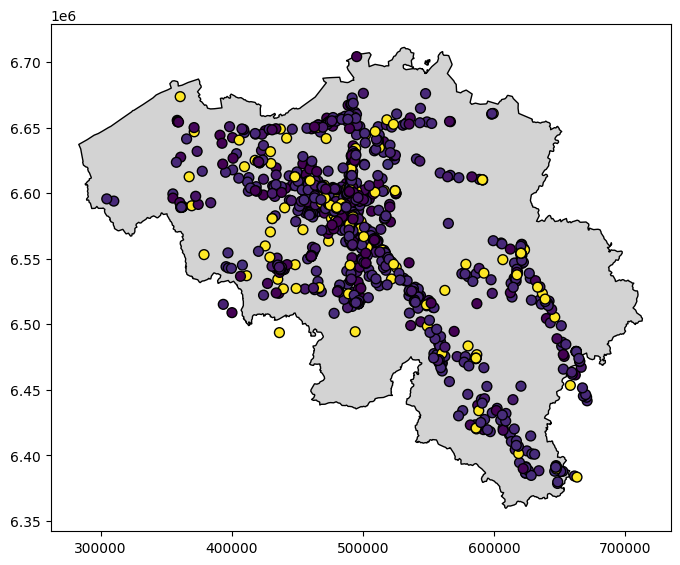

In [15]:
fig, ax = plt.subplots(figsize=(8, 10))
belgium.plot(ax=ax, color="lightgrey", edgecolor = "black")

filtered_gdf.plot(column='incident_type', cmap='viridis', markersize=50, ax=ax, edgecolor="k")
plt.show()

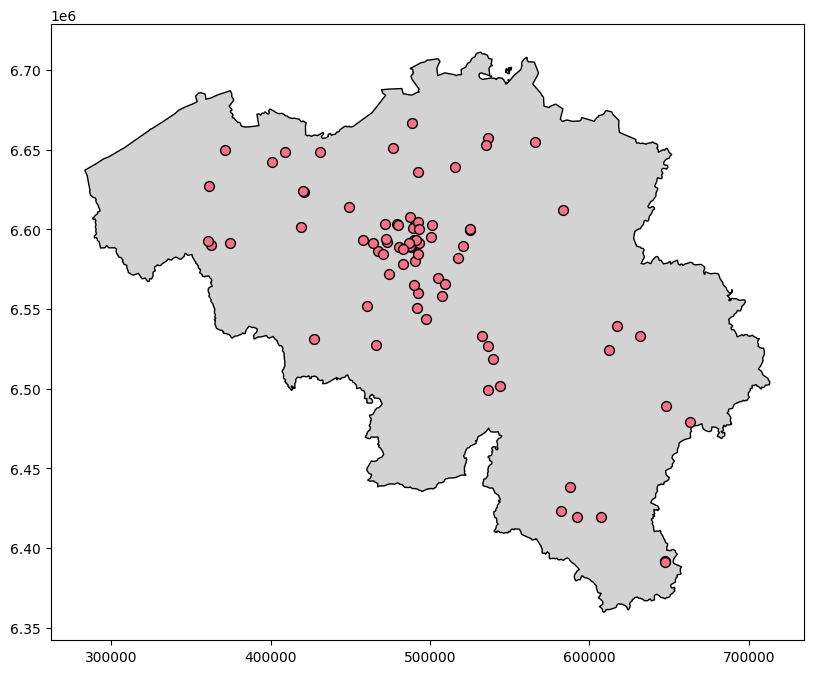

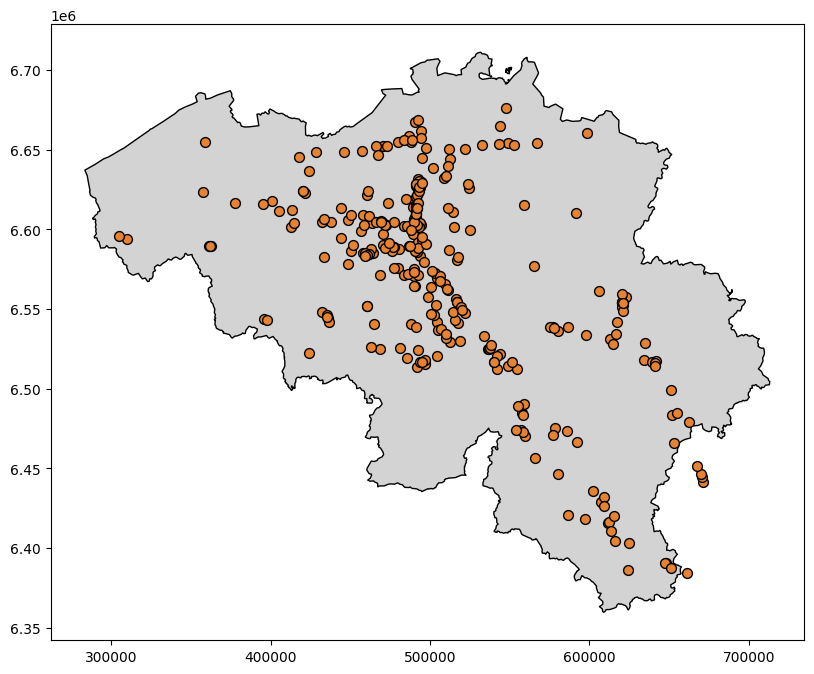

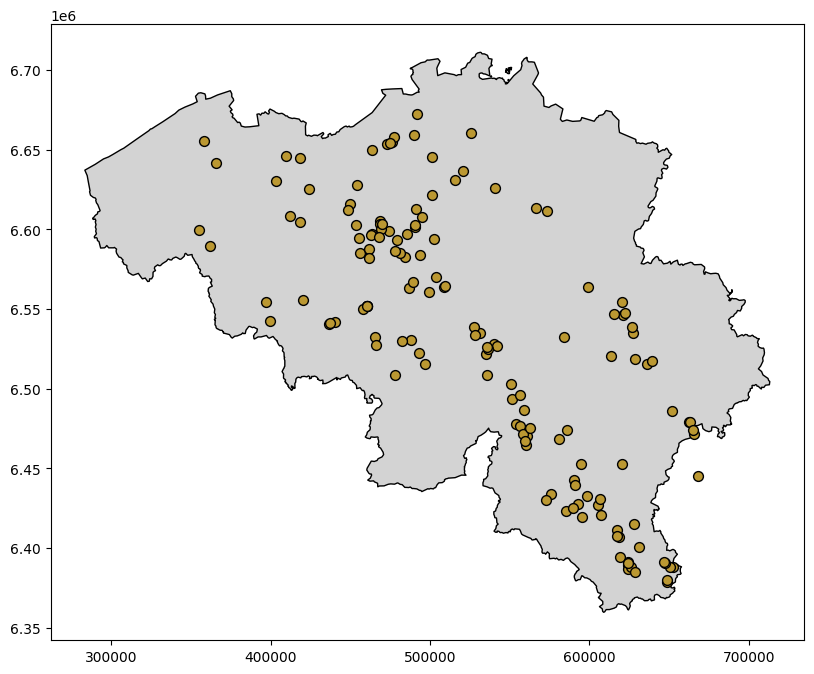

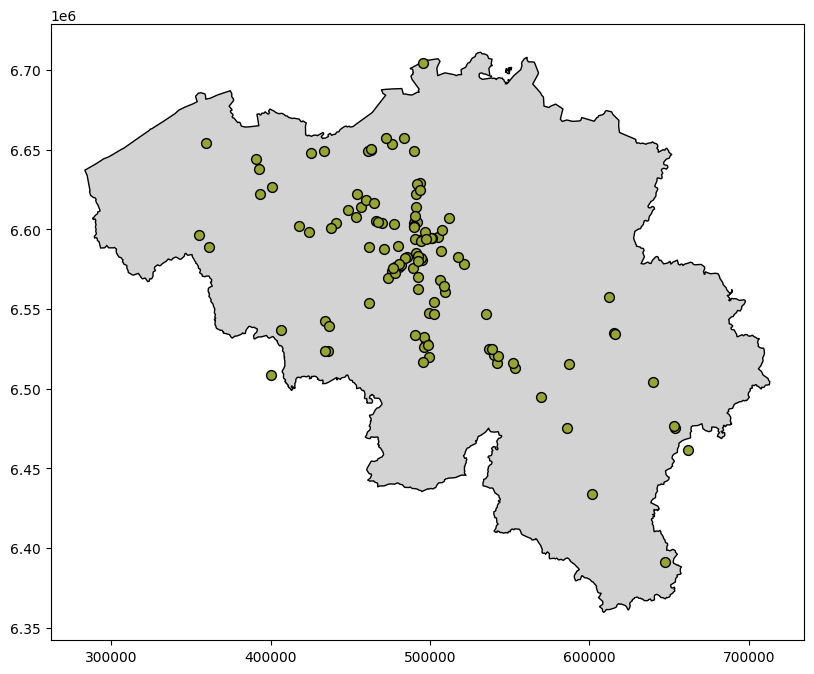

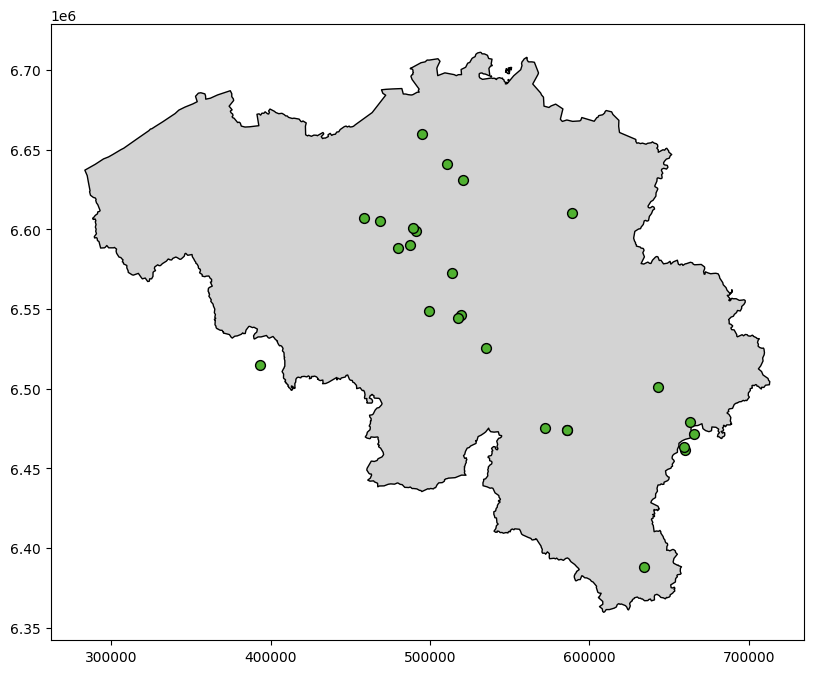

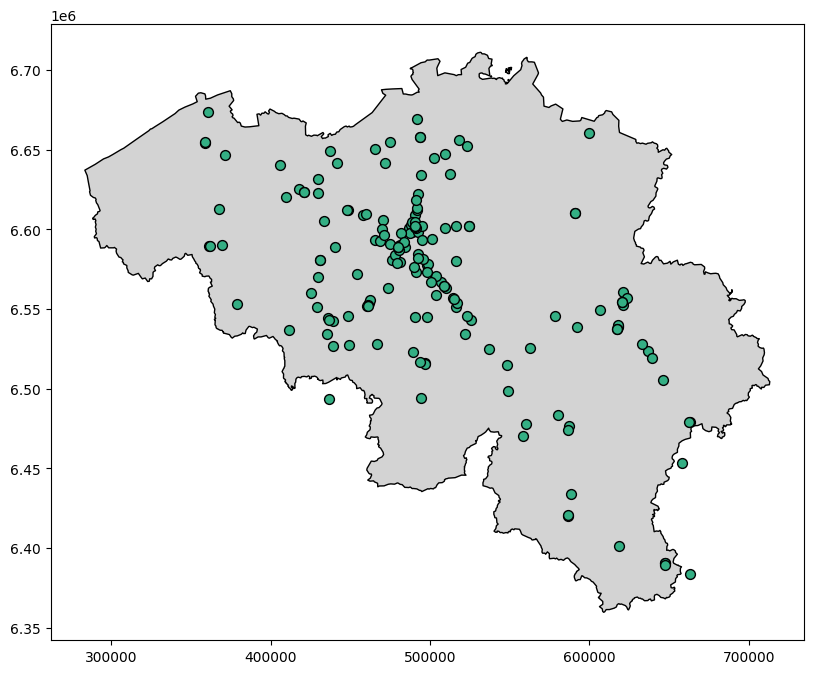

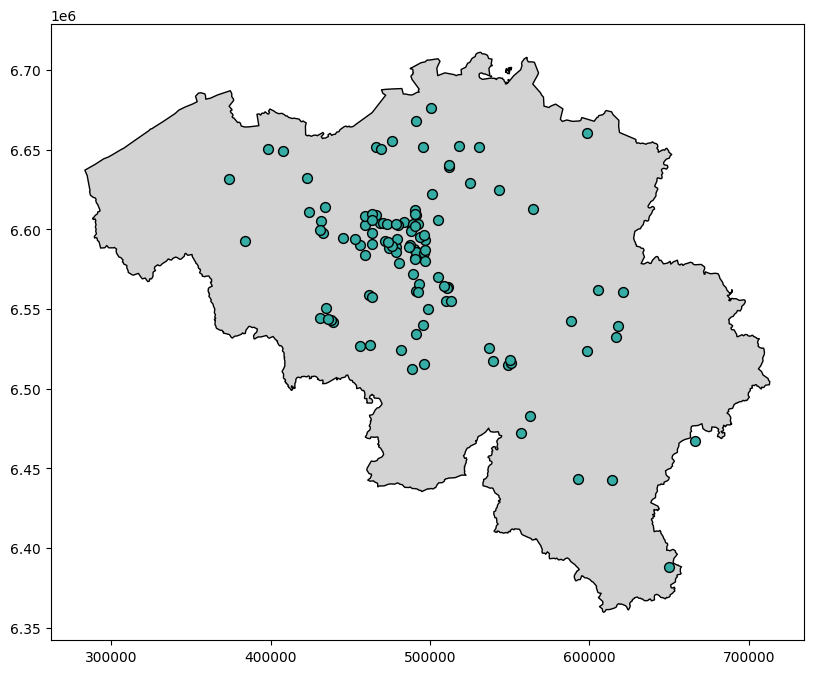

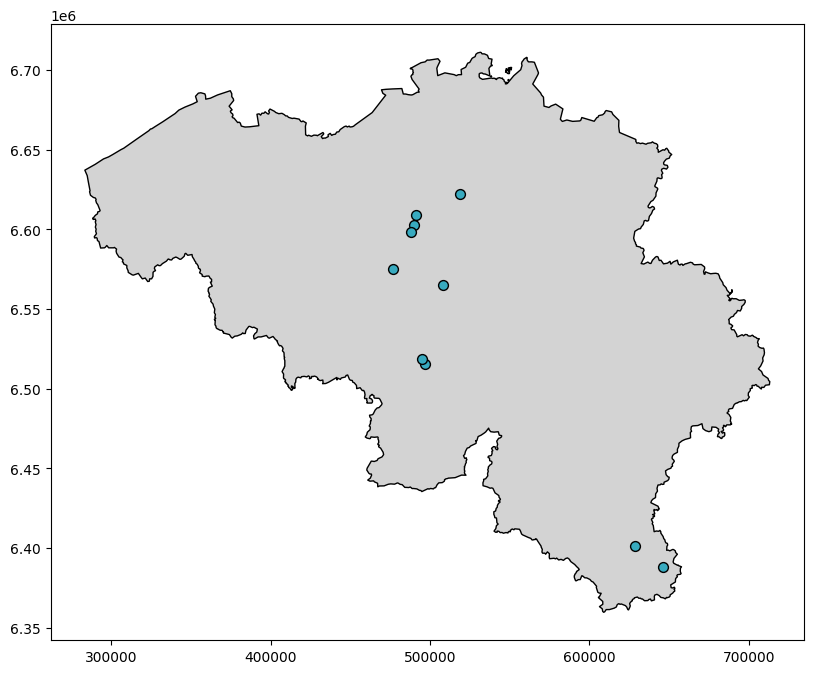

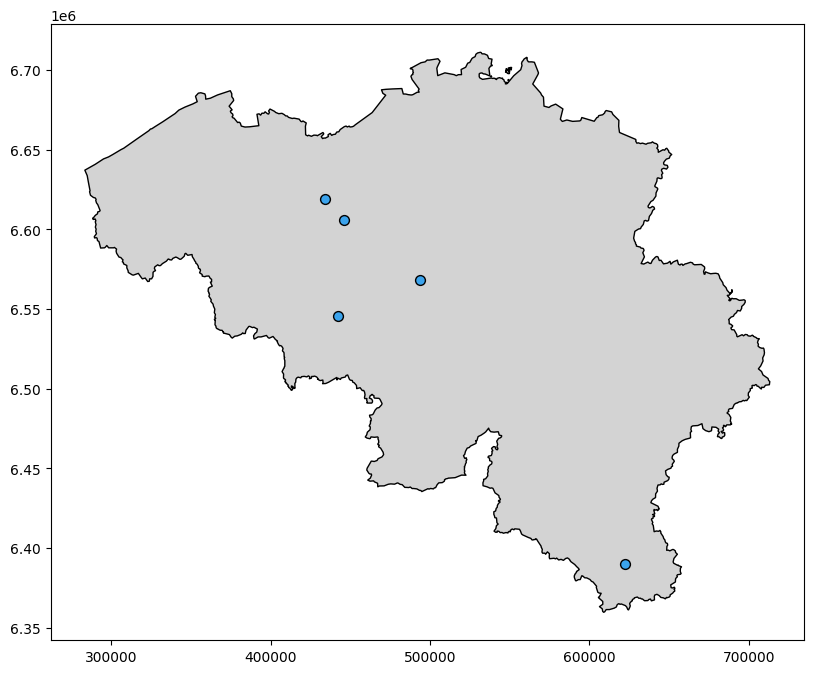

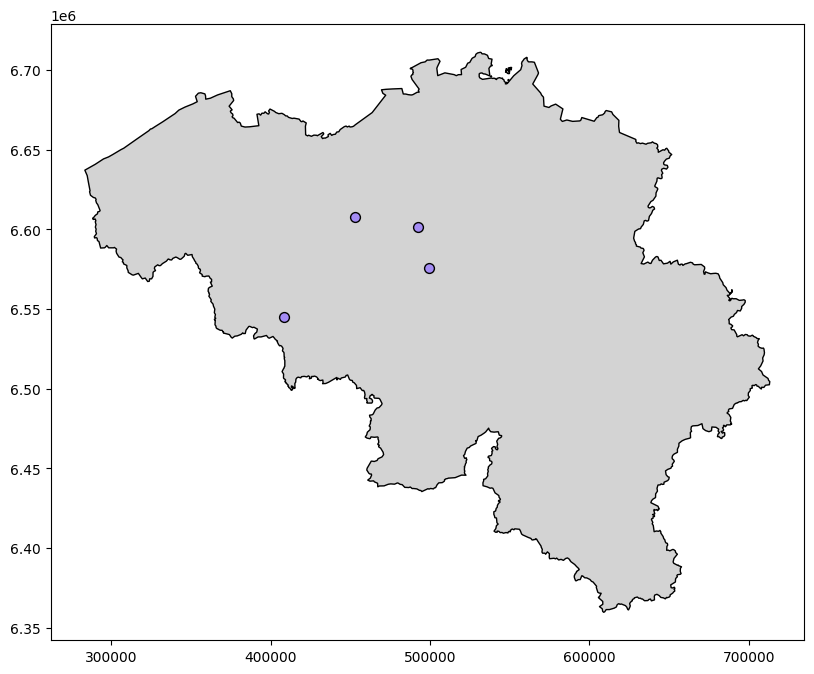

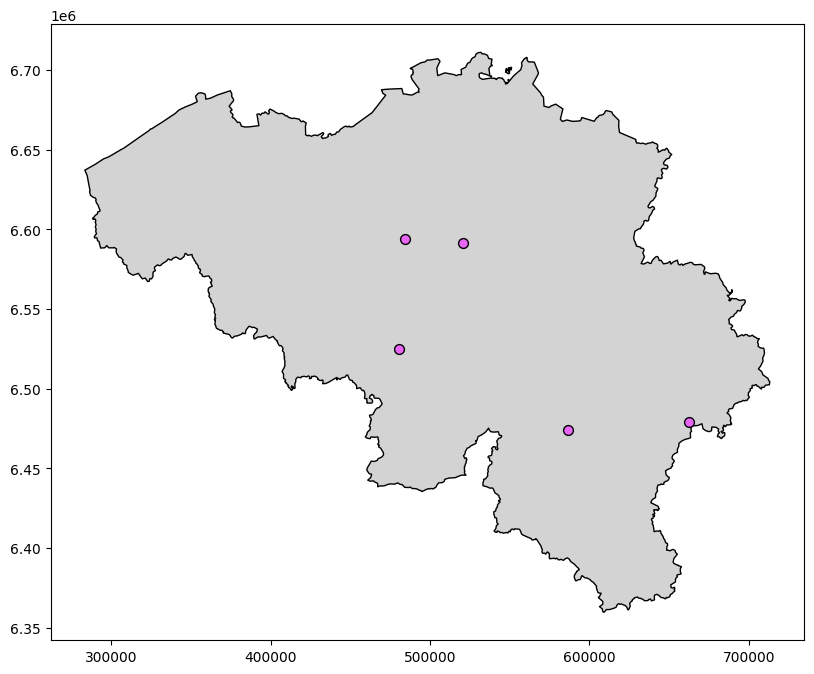

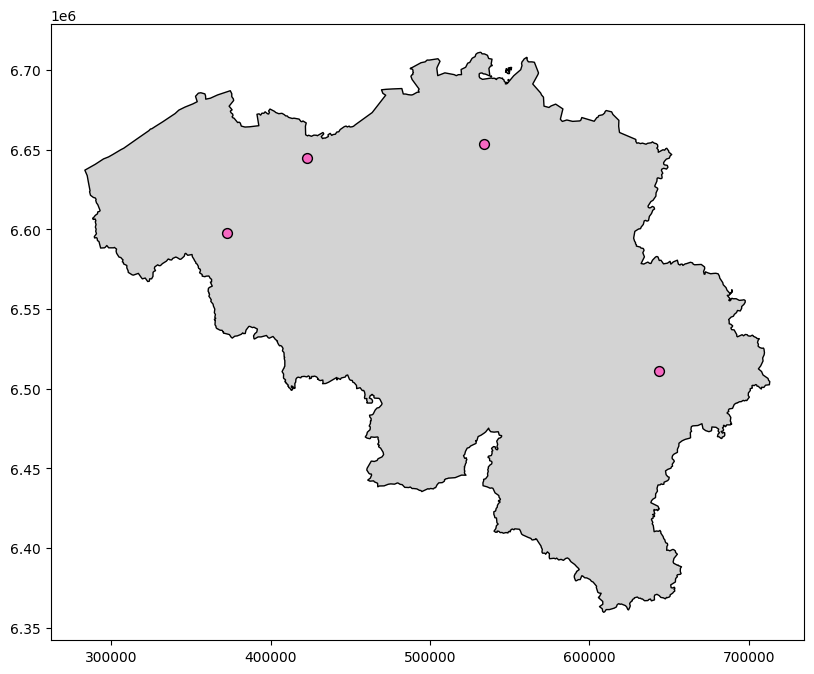

In [17]:
incidents = gdf.incident_type.unique()
colors = sns.color_palette("husl", len(incidents))
filtered_gdf = gdf[gdf.approx_lat>45]

for i, incident in enumerate(incidents):
    fig, ax = plt.subplots(figsize=(10, 8))
    belgium.plot(ax=ax, color="lightgrey", edgecolor = "black")
    subset = filtered_gdf[filtered_gdf.incident_type == incident]
    subset.plot(color=colors[i], markersize=50, edgecolor='k', ax=ax)
    plt.show()